# EdTech Business Data Analysis

## Objective
Analyze student acquisition, conversion performance, revenue contribution, and engagement behavior using SQL-driven analytics.

## Dataset Overview
- 10,000 students
- 6,021 enrollments
- Multi-source acquisition channels
- Class engagement tracking
- Email funnel simulation

This analysis simulates a real EdTech business scenario.


In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database
conn = sqlite3.connect("../data/edtech.db")


## 1. Funnel Overview

### Business Question:
What is the overall conversion performance of the platform?


In [8]:
query = """
SELECT 
    COUNT(DISTINCT s.student_id) AS total_students,
    COUNT(DISTINCT e.student_id) AS converted_students,
    ROUND(
        COUNT(DISTINCT e.student_id) * 1.0 /
        COUNT(DISTINCT s.student_id) * 100, 2
    ) AS conversion_rate_percentage
FROM students s
LEFT JOIN enrollments e
ON s.student_id = e.student_id;
"""
overview_df = pd.read_sql_query(query, conn)
overview_df

,total_students,converted_students,conversion_rate_percentage
0,10000,5347,53.47


### Insight

Out of 10,000 acquired students, approximately 53% converted into paid enrollments.

This indicates a strong baseline funnel performance for the simulated EDTech Platform.

## 2. Revenue Analysis

### Business Question:
Which batches generate the highest revenue?


In [9]:
query = '''
SELECT 
batch_name, sum(price) as batch_revenue
from enrollments
GROUP BY batch_name
ORDER BY batch_revenue DESC;
'''
revenue_df = pd.read_sql_query(query, conn)
revenue_df

,batch_name,batch_revenue
0,Banking,9695873
1,NABARD,9449930
2,SSC CGL,9430922
3,SEBI,9358932
4,RBI Grade B,8849996


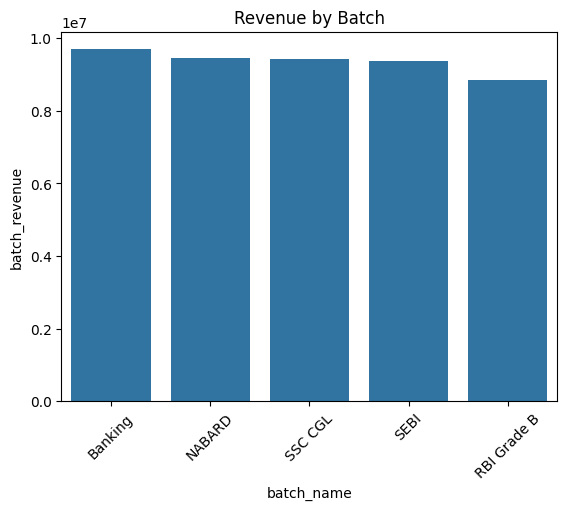

In [4]:
plt.Figure(figsize=(8,5))
sns.barplot(data = revenue_df, x = 'batch_name', y= 'batch_revenue')
plt.xticks(rotation = 45)
plt.title('Revenue by Batch')
plt.show()

### Insights
Revenue distribution across batches remains relatively balanced, with Banking generating the highest revenue (9.69M), followed closely by NABARD and SSC CGL.

The narrow revenue gap across all five batches indicates diversified revenue streams, reducing dependency on any single exam category. 

This suggests stable monetization across multiple verticals.

## 3. Revenue by Marketing Source

### Business Question:
Which acquisition channels generate the highest revenue?

In [10]:
query = '''
SELECT
s.source, sum(e.price) as source_revenue
from enrollments e
join students s
on e.student_id = s.student_id
GROUP BY s.source
ORDER BY source_revenue DESC;
'''

source_revenue_df = pd.read_sql_query(query, conn)
source_revenue_df

,source,source_revenue
0,Youtube,7948088
1,Telegram,7906097
2,Referral,7871100
3,Ads,7801103
4,Organic,7743110
5,Email,7516155


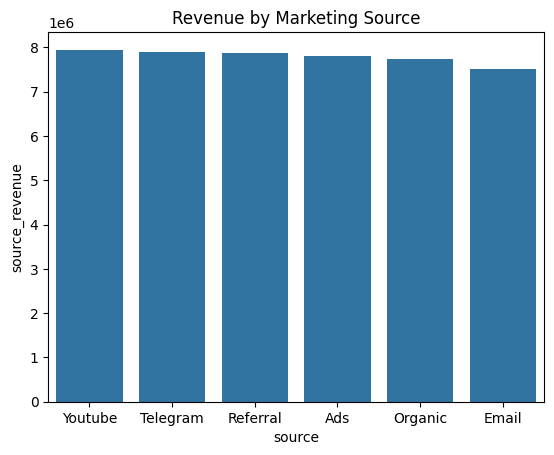

In [6]:
plt.Figure(figsize=(10,8))
sns.barplot(data= source_revenue_df, x='source', y = 'source_revenue')
plt.title('Revenue by Marketing Source')
plt.show()

### Insight
YouTube generates the highest revenue contribution (7.95M), closely followed by Telegram and Referral channels.

The revenue gap across acquisition channels is relatively narrow, indicating that performance is fairly distributed rather than dominated by a single source.

Email contributes the lowest revenue among all channels, suggesting comparatively weaker monetization performance.

Overall, video-based and community-driven channels (YouTube, Telegram) appear slightly stronger revenue drivers compared to Email and Organic traffic in this simulation.

## 4. Conversion Rate by Marketing Source

### Business Question:
Which acquisition channels convert users most efficiently?

In [11]:
query = '''
SELECT 
s.source, 
ROUND(
COUNT(DISTINCT e.student_id)* 1.0/
COUNT(DISTINCT s.student_id) *100,2
) as conversion_rate_percentage
from students s
LEFT JOIN enrollments e
ON s.student_id = e.student_id
GROUP BY s.source
ORDER BY conversion_rate_percentage DESC;
'''

conversion_source_df = pd.read_sql_query(query, conn)
conversion_source_df

,source,conversion_rate_percentage
0,Youtube,54.77
1,Organic,53.71
2,Ads,53.65
3,Telegram,53.37
4,Referral,53.29
5,Email,52.00


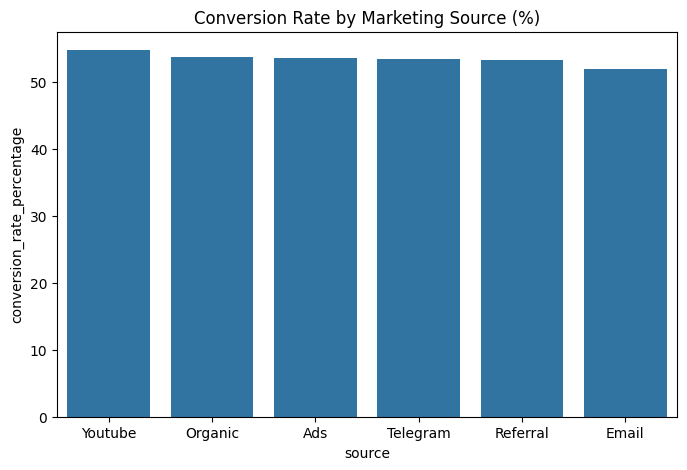

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data = conversion_source_df, x = 'source', y ='conversion_rate_percentage')
plt.title('Conversion Rate by Marketing Source (%)')
plt.show()

### Insight
YouTube shows the highest conversion rate (54.77%), followed closely by Organic and Ads traffic.

The conversion rates across all sources are tightly clustered (52%–55%), indicating relatively consistent funnel efficiency across channels rather than a standout performer.

Email has the lowest conversion rate (52.00%), suggesting comparatively weaker user intent or less effective targeting.

Since revenue and conversion are both fairly evenly distributed, this indicates that overall acquisition quality is stable across channels, and optimization efforts should focus on marginal efficiency improvements rather than drastic channel shifts.

## 5. Engagement vs Conversion

### Business Question:
Does live class engagement impact student conversion?

In [12]:
query = """
SELECT 
    CASE 
        WHEN ce.live_classes_attended > 20 THEN 'High Live Engagement'
        ELSE 'Low Live Engagement'
    END AS engagement_level,
    
    ROUND(
        COUNT(DISTINCT e.student_id) * 1.0 /
        COUNT(DISTINCT s.student_id) * 100, 2
    ) AS conversion_rate_percentage

FROM students s

LEFT JOIN class_engagement ce
ON s.student_id = ce.student_id

LEFT JOIN enrollments e
ON s.student_id = e.student_id

GROUP BY engagement_level;
"""

engagement_df = pd.read_sql_query(query, conn)
engagement_df

,engagement_level,conversion_rate_percentage
0,High Live Engagement,74.05
1,Low Live Engagement,37.18


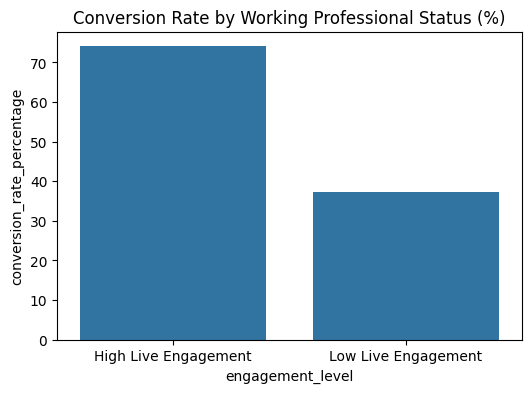

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(data = engagement_df, x='engagement_level', y='conversion_rate_percentage')
plt.title('Conversion Rate by Working Professional Status (%)')
plt.show()

### Insight

Students with High Live Engagement show a 74.05% conversion rate, while those with Low Live Engagement convert at only 37.18%.

This indicates a strong positive relationship between live participation and purchase likelihood. Students who actively attend more live sessions are nearly 2x more likely to convert compared to low-engagement users.

Live engagement appears to function as a meaningful behavioral signal of buying intent. Strengthening live class participation through reminders, limited-time offers, or interactive incentives could significantly improve overall conversion performance.

## 6. Conversion by Working Professional Status

### Business Question:
Do working professionals convert differently compared to non-working students?

In [13]:
query = """
SELECT 
    s.working_professional,
    ROUND(
        COUNT(DISTINCT e.student_id) * 1.0 /
        COUNT(DISTINCT s.student_id) * 100, 2
    ) AS conversion_rate_percentage
FROM students s
LEFT JOIN enrollments e
ON s.student_id = e.student_id
GROUP BY s.working_professional;
"""
working_prof_df = pd.read_sql_query(query, conn)
working_prof_df


,working_professional,conversion_rate_percentage
0,0,61.28
1,1,41.08


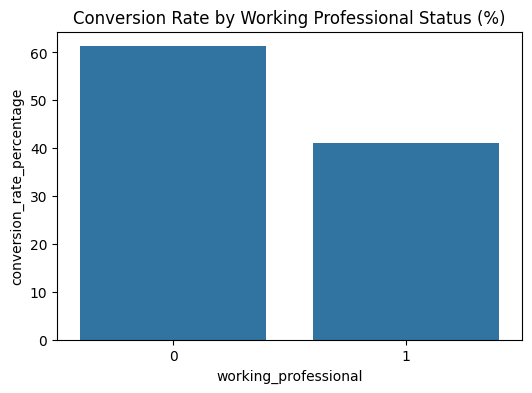

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(data = working_prof_df, x = 'working_professional', y = 'conversion_rate_percentage')
plt.title('Conversion Rate by Working Professional Status (%)')
plt.show()

### Insight
Non-working students shows a 61.28% conversion rate, while working professionals convert at only 41.08%.

This indicates a significant 20% conversion gap between the two segments.

Working professionals are substantially less likely to enroll compared to full-time students, possibly due to time constrainsts, schedule conflicts, or prederence for felxible learning formats.

This suggest that working professional may required differentiated product design, such as
- Weekend-only batches
- Structured recorded learning paths
- Short-duration revision programs
- EMI-based pricing options

Targeted product adaptation for working professionals could help bridge this conversion gap and unlock additional revenue potential.

## 7. Revenue by Working Professional Status

### Business Question:
Do working professionals contribute differently to overall revenue?

In [14]:
query = '''
select s.working_professional, sum(e.price) as total_revenue
from enrollments e
join students s
on e.student_id = s.student_id
group by s.working_professional
'''

revenue_working_df = pd.read_sql_query(query, conn)
revenue_working_df

,working_professional,total_revenue
0,0,32889241
1,1,13896412


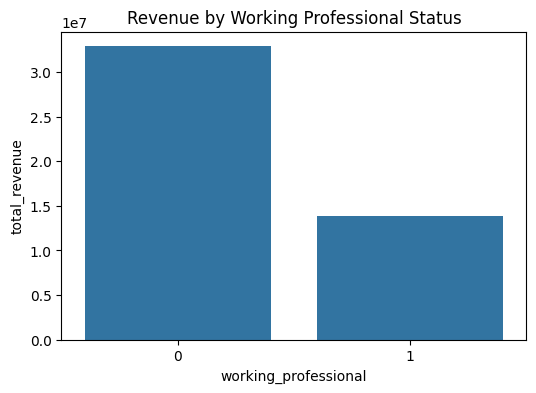

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(data=revenue_working_df, 
            x="working_professional", 
            y="total_revenue")
plt.title("Revenue by Working Professional Status")
plt.show()


### Insight

Non-working students contribute 32.98M in total revenue, while working professionals contribute 13.89M.

This aligns with earlier findings where non-working students showed significantly higher conversion rates (61.28% vs 41.08%)

The revenue gap suggests that working professionals represent an under-optimized revenue segments rather thatn a low-value segment.

Desoite being fewer in revenue contribution, working professionals still generate substantial revenue, indicating untapped potential if converison and engagement strategies are improved.

## 8. Engagement Pattern by Working Professional

### Business QUestion:
Do working professionals engage differently in live sessions?

In [15]:
query = ''' 
select s.working_professional, 
round(avg(ce.live_classes_attended), 2) as avg_live_attendance
from students s
join class_engagement ce
on s.student_id = ce.student_id
group by s.working_professional;
'''

engagement_working_df = pd.read_sql_query(query, conn)
engagement_working_df

,working_professional,avg_live_attendance
0,0,22.49
1,1,14.78


### Insight

Non-working students attend an average of 22.49 live classes, while working professionals attend only 14.78 live classes on average.

This lower engagement level among working professionals directly explains their lower coversion rate (41.08%) and lower revenue contribution.

The data suggests that time availability and scheduling constrainsts likely reduce live participation for working professionals, which in turn negatively impacts purchase likelihood.

This establishes a clear behavioral chain:

Lower Live ENgagement -> Lower Conversion -> Lower Revenue

## 9. Email Funnel Performance Analysis

### Business Question:
How does email engagement (opens & Clicks) influence conversion behavior?

In [16]:
query = '''
select round(
count(case when converted = 1 Then 1 end) * 1.0/
count(*) * 100)
as email_converion_rate_percentage
from email_funnel;
 '''

email_conversion_df = pd.read_sql_query(query, conn)
email_conversion_df

,email_converion_rate_percentage
0,57.0


In [31]:
query = ''' 
select
case
when emails_opened>8 then 'High Email Engagement'
when emails_opened>3 then 'Medium Email Engagement'
else 'Low Email Engagement'
end as email_engagement_level,

round(
count(case when converted = 1 then 1 end) * 1.0/
count(*) * 100
) as conversion_rate_percentage
from email_funnel
group by email_engagement_level
order by conversion_rate_percentage desc;
'''

email_engegement_df = pd.read_sql_query(query, conn)
email_engegement_df

,email_engagement_level,conversion_rate_percentage
0,High Email Engagement,81.0
1,Medium Email Engagement,57.0
2,Low Email Engagement,15.0


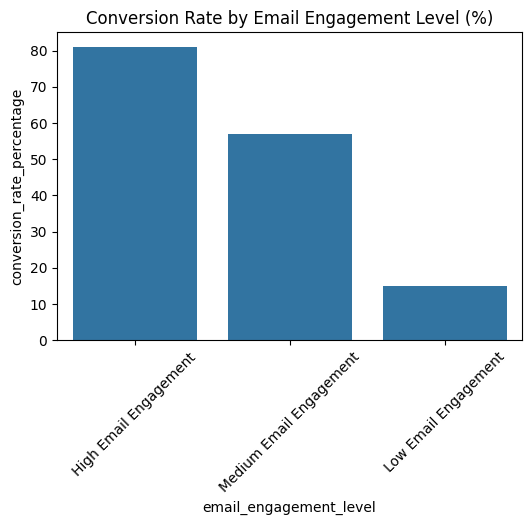

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(data=email_engegement_df, 
            x="email_engagement_level", 
            y="conversion_rate_percentage")
plt.title("Conversion Rate by Email Engagement Level (%)")
plt.xticks(rotation =45)
plt.show()


### Insigth

High email engagement users convert at 81%,

Medium engagement users at 57%,

while Low engagement users convert at 15%.

This demonstrates a strong positive relationship between email intraction intensity and purchase likelihood.

Users who frequently open emails and click links exhibit significantly higher buyig intent, indicating that email enagement function as a high-signal behavioral indicator in the acquisition funnel.


### Business Interpretation

Segmenting users by email engagement level allows targeted retargeting strategies rather than uniform mass campaigns.


# Executive Summary

This analysis evaluated the performance of a simulated EdTech platform using SQL-driven analytics acroos 10,000 students and multiple acquisition channels.

THe objective was to understand acquisition efficiency, revenue contribution, engagement behavior, and conversion drivers.

### Key Findings

- Overall Funnel Performance

The platform maintains a strong baseline conversion rate, indicating a stable acquisition-to-tnrollment pipeline.

- Revenue Distribution

Revenue is relatively balanced across exam categories, reducing dependency on single batch. Banking emerged as the highest revenue contributor, but the gap across categoriese remains narrow, suggesting diversifed monetization.

- Acquisition Channel Efficiency

Conversion and revenue performance across marketing sources are closedly clustered, indicating stable squisition quality across channels, No single channel shows extreme underperformance or dominance.

- Engagement as a Primary Conversion Driver

Live class participation demonstrates a strong positive relationship with enrollment probability. High-engagement students convert at nearly double the rate of low-engagement users, making engagement one of the most impactful levers for growth.

- Working Professional Segment Gap

Working professionals show significantly lower engagement and conversion rates compared to non-working students. This indicated an opportunity to redesign product delivery (weekend batches, structured recordings, flexible formats) to unlock additional revenue from this segment.

- Email Funnel Intelligence

Email engegement strongly correlated with purchase behavior. HIgh email interaction users conver at substantially higher rates than low engagement users, reinforcing the importance of personalized, click-driven email strategies.

### Strategic Prioritization

Based on impace magnitude:

1. Optimize student engagement (highest influence on conversion)
2. Improve product alignment for working professionals.
3. Enhance email personalization and nurture strategies.
4. Maintain balanced acquisition channel investment with incremental optimization.

### Business Impact

The analysis demonstrates that behavioral and product-level optimizations offer significantly higher growth potential than channel-level budget shifts.

Focusing on engagement intesity and segment-specific product design can improve conversion rates, increase revenue per user, and strengthen long-term customer value.